# Omrežja

# Networks

## Knjižnica `networkx`

Enostavno opravljanje z omrežnimi podatki v Pythonu.

## Library `networkx`

Simple handling of graph data in Python.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

### Gradnja grafa

Ustvarimo enostaven graf.

### Graph creation

Create a simple graph.

In [2]:
G = nx.Graph()    # Undirected
# G = nx.DiGraph()  # Directed

G.add_node("Ana")
G.add_nodes_from(["Bojan", "Danica"])

G.add_edge("Ana", "Bojan")
G.add_edge("Ana", "Cene")
G.add_edge("Ana", "Danica")
G.add_edge("Bojan", "Danica")

In [3]:
G.nodes

NodeView(('Ana', 'Bojan', 'Danica', 'Cene'))

In [4]:
G.edges

EdgeView([('Ana', 'Bojan'), ('Ana', 'Cene'), ('Ana', 'Danica'), ('Bojan', 'Danica')])

Graf zapišemo v datoteko.

Write the graph into a file.

In [5]:
nx.write_pajek(G, 'podatki/mreza-primer.net')

Preberemo `.net` datoteko v Graph strukturo.

Read the `.net` file in a Graph structure. 

In [6]:
G = nx.read_pajek('podatki/mreza-primer.net')

### Prikaz grafa

Narišite strukturo grafov z uporabo `matplotlib`.

Za več možnosti glejte <a href="https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx">the documentation.</a>

### Drawing the graph

Draw the graph structure using `matplotlib`.

For more options, see <a href="https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx">the documentation.</a>

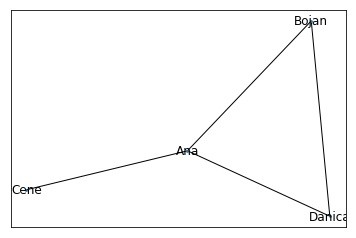

In [7]:
nx.draw_networkx(G, with_labels=True, node_size=3)

Izračunamo velikosti vozlišč sorazmerno s številom povezav vozlišča. Rišite z uporabo `draw.networkx(...,node_size=node_size)`

Compute node sizes proportional to the number of edges for a node. Plot using `draw.networkx(...,node_size=node_size)`

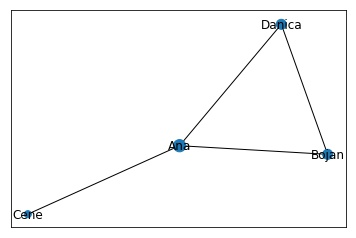

In [8]:
node_size = [50 * G.degree(ky) for ky in G.nodes]

nx.draw_networkx(G, with_labels=True, node_size=node_size)

### Segmentacija omrežja

Iskanje močno povezanih komponent v omrežju.

### Network segmentation

Finding strongly connected components inside a network.

Najprej, generiramo umetno omrežje.

First, we generate a synthetic network.

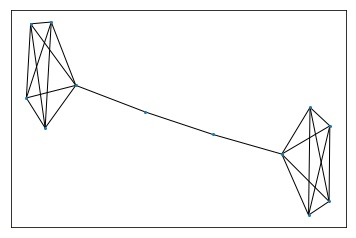

In [9]:
G = nx.barbell_graph(5, 2)
nx.draw_networkx(G, with_labels=False, node_size=4)

Nato najdemo k-povezanih komponent. k-komponent je povezani podgraf, za katerega moramo odstraniti vsaj k vozlišč, da jih razbijemo v več komponent. Intuitivno, podgrafi z veliko vrednostjo k težje razbijemo in so posledično močneje povezani.

Next, we find the k-connected components. A k-connected component is a connected subgraph, for which we need to remove at least k nodes to break it into more components. Intuitively, subgraphs with  large value of k are harder to break and thus more strongly connected.

In [10]:
from networkx.algorithms import approximation as apxa
k_components = apxa.k_components(G)

k_components

defaultdict(list,
            {1: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}],
             2: [{7, 8, 9, 10, 11}, {0, 1, 2, 3, 4}],
             3: [{0, 1, 2, 3, 4}, {7, 8, 9, 10, 11}],
             4: [{0, 1, 2, 3, 4}, {7, 8, 9, 10, 11}]})

Oglejmo si rešitve za določen k in poglejmo število vozlišč na vsaki povezani komponenti.

Let's look at solutions for a given k and look at the number of nodes on each connected component.

In [11]:
k = 2                   # Subgraphs of connectivity k
sol = k_components[k]   # Multiple solutions of k_components
list(map(len, sol))     # Each component breaks a graph

[5, 5]

Za vsako povezano komponento dodelite rdečo barvo ustreznim vozliščem in sivo za vsa druga vozlišča.

For each connected component, assign the red color to its corresponding nodes and gray to all other nodes.

In [12]:
colors_groups = list()
for gi, group in enumerate(sol):
    colors_arr = ["red" if (n in group) else "gray" for n in G.nodes]
    colors_groups.append(colors_arr)

Narišite izbrano komponento.

Plot a selected component.

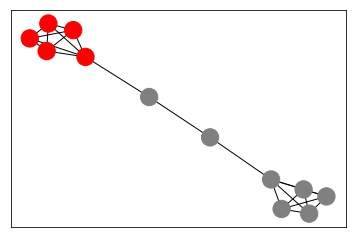

In [13]:
comp_index = 0
plt.figure()
nx.draw_networkx(G, with_labels=False, 
                 node_color=colors_groups[comp_index],)
plt.show()

## Grafična analiza omrežij z Orange

Uporabimo programski paket <b>Orange</b> oz. dodatek <b>"Networks"</b>.
<img src="../slike/network_scheme.png"/> <br/> 

Podatke naložimo z vtičnikom <b>Network File</b>, ki prebere podatke o vozliščih in povezavah.
<img src="../slike/network_widget.png"/> <br/> 

Z uporabo algoritmov v vtičniku <b>Network Clustering</b> poiščemo močno povezane komponente v omrežju.
<img src="../slike/network_clusters.png"/> <br/> 

## Naloge

##### Vprašanje 11-1-1

Zgradi omrežje igralcev v podatkovni zbirki MovieLens. 

[Odgovor](211-1.ipynb#Odgovor-11-1-1)

##### Vprašanje 11-1-2

Zgradi omrežje uporabnikov v podatkovni zbirki MovieLens. 

[Odgovor](211-1.ipynb#Odgovor-11-1-2)